In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['variety'] = encoder.fit_transform(df['variety'])

In [7]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df = df[df['variety'] != 0][['sepal.width','petal.length','variety']]

In [9]:
df.head()

,sepal.width,petal.length,variety
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

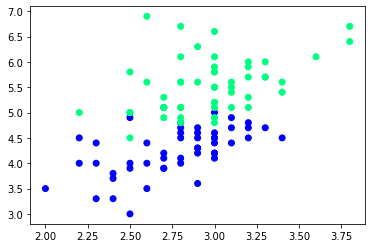

In [11]:
plt.scatter(df['sepal.width'],df['petal.length'],c=df['variety'],cmap='winter')

In [12]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [14]:
df_train

,sepal.width,petal.length,variety
76,2.8,4.8,1
50,3.2,4.7,1
95,3.0,4.2,1
91,3.0,4.6,1
72,2.5,4.9,1
114,2.8,5.1,2
57,2.4,3.3,1
120,3.2,5.7,2
78,2.9,4.5,1
140,3.1,5.6,2


In [15]:
df_val

,sepal.width,petal.length,variety
97,2.9,4.3,1
58,2.9,4.6,1
122,2.8,6.7,2
141,3.1,5.1,2
127,3.0,4.9,2


In [16]:
df_test

,sepal.width,petal.length,variety
60,2.0,3.5,1
147,3.0,5.2,2
52,3.1,4.9,1
87,2.3,4.4,1
115,3.2,5.3,2


In [17]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

# Case 1 - Bagging

In [18]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal.width,petal.length,variety
57,2.4,3.3,1
76,2.8,4.8,1
76,2.8,4.8,1
78,2.9,4.5,1
50,3.2,4.7,1
95,3.0,4.2,1
50,3.2,4.7,1
114,2.8,5.1,2


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [20]:
dt_bag1 = DecisionTreeClassifier()

In [21]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

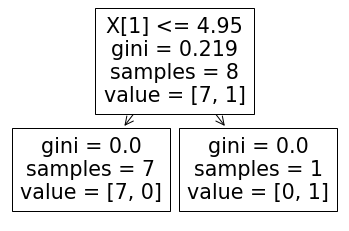

0.8


/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


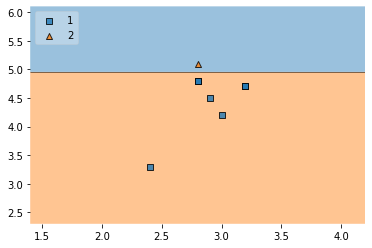

In [22]:
evaluate(dt_bag1,X,y)

In [23]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal.width,petal.length,variety
50,3.2,4.7,1
57,2.4,3.3,1
114,2.8,5.1,2
95,3.0,4.2,1
76,2.8,4.8,1
91,3.0,4.6,1
76,2.8,4.8,1
140,3.1,5.6,2


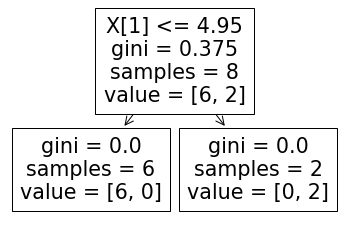

0.8


/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


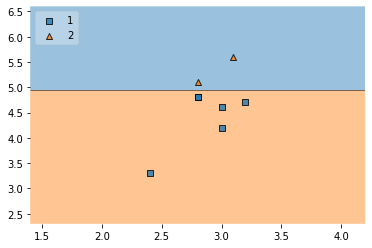

In [24]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal.width,petal.length,variety
72,2.5,4.9,1
76,2.8,4.8,1
120,3.2,5.7,2
57,2.4,3.3,1
76,2.8,4.8,1
57,2.4,3.3,1
91,3.0,4.6,1
140,3.1,5.6,2


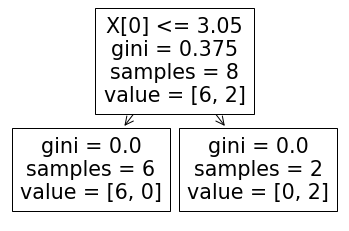

0.6


/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


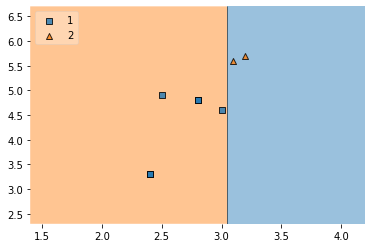

In [26]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [27]:
df_test

,sepal.width,petal.length,variety
60,2.0,3.5,1
147,3.0,5.2,2
52,3.1,4.9,1
87,2.3,4.4,1
115,3.2,5.3,2


In [28]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,4.3]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,4.3]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,4.3]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anlayticalnahid/ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [29]:
# Row sampling without replacement
df_train

,sepal.width,petal.length,variety
76,2.8,4.8,1
50,3.2,4.7,1
95,3.0,4.2,1
91,3.0,4.6,1
72,2.5,4.9,1
114,2.8,5.1,2
57,2.4,3.3,1
120,3.2,5.7,2
78,2.9,4.5,1
140,3.1,5.6,2


In [30]:
df_train.sample(8)

,sepal.width,petal.length,variety
57,2.4,3.3,1
76,2.8,4.8,1
120,3.2,5.7,2
95,3.0,4.2,1
91,3.0,4.6,1
72,2.5,4.9,1
140,3.1,5.6,2
78,2.9,4.5,1


# Random Subspaces

In [31]:
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10) 

In [32]:
df1

,sepal.length,sepal.width,petal.length,petal.width,variety
135,7.7,3.0,6.1,2.3,Virginica
8,4.4,2.9,1.4,0.2,Setosa
137,6.4,3.1,5.5,1.8,Virginica
35,5.0,3.2,1.2,0.2,Setosa
149,5.9,3.0,5.1,1.8,Virginica
47,4.6,3.2,1.4,0.2,Setosa
122,7.7,2.8,6.7,2.0,Virginica
82,5.8,2.7,3.9,1.2,Versicolor
139,6.9,3.1,5.4,2.1,Virginica
118,7.7,2.6,6.9,2.3,Virginica


In [33]:
df1.sample(2,replace=True,axis=1)

,sepal.width,variety
135,3.0,Virginica
8,2.9,Setosa
137,3.1,Virginica
35,3.2,Setosa
149,3.0,Virginica
47,3.2,Setosa
122,2.8,Virginica
82,2.7,Versicolor
139,3.1,Virginica
118,2.6,Virginica


# Random Patches

In [34]:
df1

,sepal.length,sepal.width,petal.length,petal.width,variety
135,7.7,3.0,6.1,2.3,Virginica
8,4.4,2.9,1.4,0.2,Setosa
137,6.4,3.1,5.5,1.8,Virginica
35,5.0,3.2,1.2,0.2,Setosa
149,5.9,3.0,5.1,1.8,Virginica
47,4.6,3.2,1.4,0.2,Setosa
122,7.7,2.8,6.7,2.0,Virginica
82,5.8,2.7,3.9,1.2,Versicolor
139,6.9,3.1,5.4,2.1,Virginica
118,7.7,2.6,6.9,2.3,Virginica


In [35]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal.length,sepal.length
135,6.1,7.7
139,5.4,6.9
82,3.9,5.8
137,5.5,6.4
149,5.1,5.9
47,1.4,4.6
149,5.1,5.9
122,6.7,7.7
